In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import ipdb
%matplotlib inline

In [2]:
def get_samples(mean, sigma, nsamples):
    return np.random.multivariate_normal(mean, sigma, nsamples)

In [3]:
def get_ellipse(mean, covariance, n_sigma, color):
    covariance = covariance[0:2, 0:2]
    mean = mean[0:2]
    if (not any(np.diag(covariance) == 0)):
        eigen_values, eigen_vectors = np.linalg.eig(covariance)
        eigen_values = np.sqrt(eigen_values)
        width = eigen_values[0] * n_sigma
        height = eigen_values[1] * n_sigma
        theta = np.arctan2(*eigen_vectors[:,0][::-1])
        theta = np.rad2deg(theta)
        return Ellipse(xy=mean, width=width*n_sigma, height=height*n_sigma, angle=theta, facecolor='none', edgecolor=color)

In [4]:
def plot_ellipse(mean, sigma, nSigma, color):
    fig = plt.figure(1)
    ax = fig.add_subplot(111, aspect='equal')
    ellipse = get_ellipse(mean, sigma, nSigma, color)
    ax.add_artist(ellipse)


**1.- Suma de variables aleatorias bidimensionales**

Generar y dibujar  n_samples números aleatorios de dos distribuciones bidimensionales N1=N(mean1,sigma1) y N2=N(mean2,sigma2), siendo mean y sigma el vector de medias (2x1) y la matriz de covarianzas (2x2) de cada distribución, respectivamente. Emplear el comando mvnrnd() para generar las muestras.

Dibujar las respectivas elipses asociadas a cada distribución. Emplear la función PlotEllipse disponible en el Campus Virtual.

Dibujar los puntos x3 = x1+x2 y dibujar la elipse x3 ~  N(mean1+mean2,sigma1+sigma2)

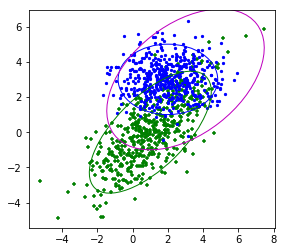

In [16]:
nsamples = 500
mean1 = np.array([1, 0])
sigma1 = np.array([[3, 2],[2, 3]])
mean2 = np.array([2, 3])
sigma2 = np.array([[2, 0],[0, 1]])

x1 = get_samples(mean1, sigma1, nsamples)
x2 = get_samples(mean2, sigma2, nsamples)
x3 = x1 + x2
plot_ellipse(mean1, sigma1, 2, 'g')
plot_ellipse(mean2, sigma2, 2, 'b')
plot_ellipse(mean1 + mean2, sigma1+sigma2, 2, 'm')
plt.scatter(x1[:,0], x1[:,1], c='g', s=20, marker='+')
plt.scatter(x2[:,0], x2[:,1], c='b', s=5)
plt.show()

**2.- Producto de gaussianas**
Con las mismas muestras x1 y x2 de antes, dibujar la elipse (gaussiana) correspondiente a la media ponderada de ambas.

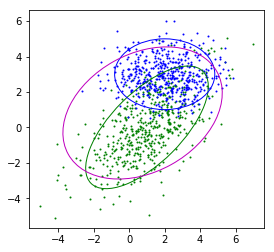

In [13]:
nsamples = 500
mean1 = np.array([1, 0])
sigma1 = np.array([[3, 2],[2, 3]])
mean2 = np.array([2, 3])
sigma2 = np.array([[2, 0],[0, 1]])

x1 = get_samples(mean1, sigma1, nsamples)
x2 = get_samples(mean2, sigma2, nsamples)


sigma3 = np.linalg.inv((np.linalg.inv(sigma1) + np.linalg.inv(sigma2)))
mean3 =  np.matmul(sigma3, np.matmul(np.linalg.inv(sigma2), mean1) + np.matmul(np.linalg.inv(sigma1), mean2))


plot_ellipse(mean1, sigma1, 2, 'g')
plot_ellipse(mean2, sigma2, 2, 'b')
plot_ellipse(mean3, sigma3, 3, 'm')
plt.scatter(x1[:,0], x1[:,1], c='g', s=1)
plt.scatter(x2[:,0], x2[:,1], c='b', s=1)

plt.show()

**3.- Transformación lineal de v.a. normales**
Con las mismas muestras x1 de antes, comprobar que la transformación x5=A\*x1+b da lugar a una dispersión normal: N(A\*mean1+b, A\*sigma1\*A’)

In [14]:
def linear_transformation(x, a, b):
    x = np.matmul(x, a)
    x = x + b
    return x

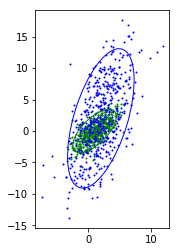

In [15]:
nsamples = 500
mean1 = np.array([1, 0])
sigma1 = np.array([[3, 2],[2, 3]])
x1 = get_samples(mean1, sigma1, nsamples)

a = np.array([[-1, 2],[2, 1.5]])
b = np.array([3,0])

x5 = linear_transformation(x1, a, b)

mean5 = np.matmul(a, mean1)
mean5 = mean5 + b

sigma5 = np.matmul(a, sigma1)
sigma5 = np.matmul(sigma5, a.T)


plot_ellipse(mean1, sigma1, 2, 'g')
plot_ellipse(mean5, sigma5, 2, 'b')
plt.scatter(x1[:,0], x1[:,1], c='g', s=1)
plt.scatter(x5[:,0], x5[:,1], c='b', s=1)

plt.show()

